#**Mushroom Classification** - GridSearchCV Hyperparameter Tuning

###1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

###2. Load dataset and handle missing data

In [ ]:
# Load the dataset from the URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = pd.read_csv(url, header=None)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing values with the mode
df.iloc[:, 11].fillna(df.iloc[:, 11].mode()[0], inplace=True)

<ipython-input-16-7842fc50c2e7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[:, 11].fillna(df.iloc[:, 11].mode()[0], inplace=True)


###3. Encode categorical features

In [ ]:
# Encode all categorical features using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Separate features and target variable
X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]   # Target

###4. Train-test split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store accuracies
accuracy_results = {}

###5. Decision Tree Classifier

In [ ]:
# Decision Tree without GridSearchCV
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt_initial = dt_classifier.predict(X_test)
initial_accuracy_dt = accuracy_score(y_test, y_pred_dt_initial)

# Decision Tree with GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
best_accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_results['Decision Tree'] = (initial_accuracy_dt, best_accuracy_dt)

###6. Random Forest Classifier

In [ ]:
# Random Forest without GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf_initial = rf_classifier.predict(X_test)
initial_accuracy_rf = accuracy_score(y_test, y_pred_rf_initial)

# Random Forest with GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
best_accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_results['Random Forest'] = (initial_accuracy_rf, best_accuracy_rf)

###7. SVM Classifier

In [ ]:
# SVM without GridSearchCV
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm_initial = svm_classifier.predict(X_test)
initial_accuracy_svm = accuracy_score(y_test, y_pred_svm_initial)

# SVM with GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
best_accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_results['SVM'] = (initial_accuracy_svm, best_accuracy_svm)

###8. SGD Classifier

In [ ]:
# SGD without GridSearchCV
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)
y_pred_sgd_initial = sgd_classifier.predict(X_test)
initial_accuracy_sgd = accuracy_score(y_test, y_pred_sgd_initial)

# SGD with GridSearchCV
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search_sgd = GridSearchCV(SGDClassifier(random_state=42), param_grid_sgd, cv=5, scoring='accuracy')
grid_search_sgd.fit(X_train, y_train)
y_pred_sgd = grid_search_sgd.best_estimator_.predict(X_test)
best_accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
accuracy_results['SGD'] = (initial_accuracy_sgd, best_accuracy_sgd)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

###9. Print all accuracies

In [ ]:
# Print accuracy results
print("\nModel Accuracies (Before and After GridSearchCV):")
for model, (initial, best) in accuracy_results.items():
    print(f"{model}: Initial Accuracy = {initial:.4f}, Best Accuracy = {best:.4f}")


Model Accuracies (Before and After GridSearchCV):
Decision Tree: Initial Accuracy = 1.0000, Best Accuracy = 1.0000
Random Forest: Initial Accuracy = 1.0000, Best Accuracy = 1.0000
SVM: Initial Accuracy = 0.9914, Best Accuracy = 1.0000
SGD: Initial Accuracy = 0.9637, Best Accuracy = 0.9692


###10. Check for overfitting

In [ ]:
# Check for overfitting
print("\nOverfitting Analysis:")
for model, (initial, best) in accuracy_results.items():
    if best - initial > 0.05:  # Arbitrary threshold to detect significant improvement
        print(f"{model}: Significant improvement detected. Initial = {initial:.4f}, Best = {best:.4f}")
    elif initial > best:
        print(f"{model}: Potential overfitting detected. Initial = {initial:.4f}, Best = {best:.4f}")
    else:
        print(f"{model}: No significant overfitting. Initial = {initial:.4f}, Best = {best:.4f}")


Overfitting Analysis:
Decision Tree: No significant overfitting. Initial = 1.0000, Best = 1.0000
Random Forest: No significant overfitting. Initial = 1.0000, Best = 1.0000
SVM: No significant overfitting. Initial = 0.9914, Best = 1.0000
SGD: No significant overfitting. Initial = 0.9637, Best = 0.9692


###11. Visualization of accuracy results

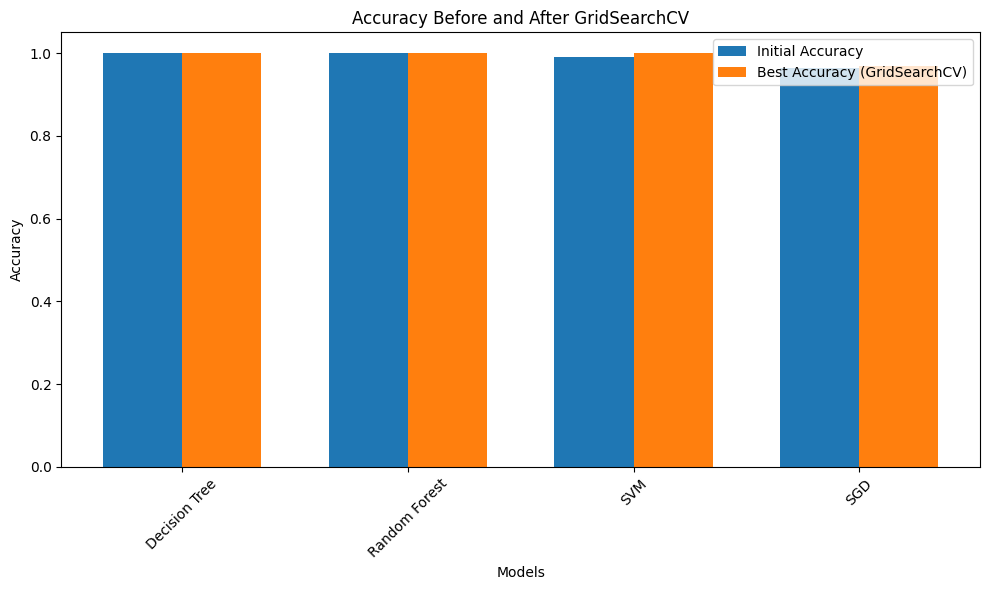

In [ ]:
# Visualization of accuracy results
models = list(accuracy_results.keys())
initial_accuracies = [accuracy_results[model][0] for model in models]
best_accuracies = [accuracy_results[model][1] for model in models]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, initial_accuracies, width, label='Initial Accuracy')
plt.bar(x + width/2, best_accuracies, width, label='Best Accuracy (GridSearchCV)')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After GridSearchCV')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()